In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("garments_worker_productivity.csv")
print(df.head())

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [ ]:
df.info


<bound method DataFrame.info of            date   quarter  department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.70

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


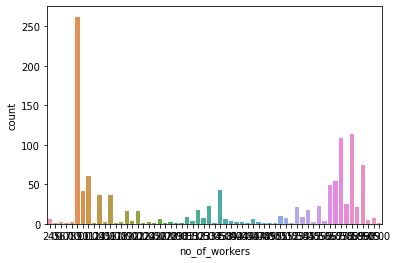

In [ ]:
sns.countplot(df['no_of_workers'])

In [ ]:
# for i in df['quarter']:
# #     print(i)
#     if i=="Quarter1":
#         i="1.0"
#     elif i=="Quarter2":
#         i="2.0"
# print(df['department'][1])
df['department']=df['department'].replace({'sweing':'1.0'})

df['department']=df['department'].replace('finishing','2.0')

df['department']=df['department'].replace('finishing ','2.0')
df['quarter'] = df['quarter'].replace({'Quarter1': '1.0'})
df['quarter'] = df['quarter'].replace({'Quarter2': '2.0'})
df['quarter'] = df['quarter'].replace({'Quarter3': '3.0'})
df['quarter'] = df['quarter'].replace({'Quarter4': '4.0'})
df['quarter'] = df['quarter'].replace({'Quarter5': '5.0'})

df['day']=df['day'].replace("Monday","10")
df['day']=df['day'].replace("Tuesday","20")
df['day']=df['day'].replace("Wednesday","30")
df['day']=df['day'].replace("Thursday","40")
df['day']=df['day'].replace("Friday","50")
df['day']=df['day'].replace("Saturday","60")
df['day']=df['day'].replace("Sunday","70")
# print("converted",df['quarter'])
print("converteed",df['day'])

converteed 0       40
1       40
2       40
3       40
4       40
        ..
1192    30
1193    30
1194    30
1195    30
1196    30
Name: day, Length: 1197, dtype: object


In [ ]:
df['quarter']=df['quarter'].astype(float)
df['department']=df['department'].astype(float)
df['day']=df['day'].astype(float)

In [ ]:
df.replace("NaN","0.0")
df['wip']=df['wip'].replace("NaN")

In [ ]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
df['wip'].replace([np.nan],df['wip'].mean,inplace=True)


In [ ]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
df['date'] = pd.to_numeric(pd.to_datetime(df['date']))

df['wip'] = pd.to_numeric(df['wip'], errors='coerce')

In [ ]:
np.isnan(df.any()) #and gets False
np.isfinite(df.all()) #and gets True

date                     True
quarter                  True
department               True
day                      True
team                     True
targeted_productivity    True
smv                      True
wip                      True
over_time                True
incentive                True
idle_time                True
idle_men                 True
no_of_style_change       True
no_of_workers            True
actual_productivity      True
dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['wip'],axis=1)

y = df['no_of_workers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
X.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1420070400000000000,1.0,1.0,40.0,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1420070400000000000,1.0,2.0,40.0,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1420070400000000000,1.0,1.0,40.0,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1420070400000000000,1.0,1.0,40.0,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1420070400000000000,1.0,1.0,40.0,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
X_train.shape

(957, 14)

In [ ]:
y_train.shape

(957,)

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
text_scores_encoded = lab_enc.fit_transform(y_test)
# print(training_scores_encoded)
# print(utils.multiclass.type_of_target(y_train))
# print(utils.multiclass.type_of_target(y_train.astype('int')))
# print(utils.multiclass.type_of_target(training_scores_encoded))
# print(utils.multiclass.type_of_target(text_scores_encoded))

In [ ]:
X_test.fillna(X_test.mean())

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1189,1426032000000000000,2.0,1.0,30.0,8,0.70,30.48,6840,30,0.0,0,1,57.0,0.700505
1101,1425686400000000000,1.0,1.0,60.0,2,0.65,16.10,4200,0,0.0,0,1,45.0,0.650240
525,1422662400000000000,5.0,2.0,60.0,9,0.75,3.94,240,0,0.0,0,0,2.0,0.971867
1109,1425772800000000000,2.0,2.0,70.0,1,0.75,3.94,960,0,0.0,0,0,8.0,0.890604
336,1421625600000000000,3.0,1.0,10.0,12,0.35,15.26,6120,23,0.0,0,0,34.0,0.350218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,1421625600000000000,3.0,1.0,10.0,7,0.80,48.84,10260,30,0.0,0,0,57.0,0.576460
101,1420502400000000000,1.0,2.0,20.0,8,0.80,2.90,1440,0,0.0,0,0,8.0,0.681061
418,1422144000000000000,4.0,2.0,70.0,1,0.70,3.94,1440,0,0.0,0,0,8.0,0.970076
273,1421280000000000000,3.0,1.0,40.0,4,0.65,22.52,10080,26,0.0,0,0,56.0,0.650131


[Text(0.5851172972261236, 0.9772727272727273, 'X[12] <= 8.5\ngini = 0.916\nsamples = 957\nvalue = [5, 1, 2, 1, 3, 214, 34, 48, 1, 31, 2, 27, 1\n3, 10, 3, 10, 2, 1, 4, 1, 1, 1, 6, 3, 13, 4\n18, 1, 36, 5, 3, 2, 1, 1, 4, 2, 1, 1, 1, 7\n4, 1, 20, 7, 16, 2, 18, 3, 44, 42, 79, 22, 93\n20, 60, 4, 6, 1]'),
 Text(0.4644487359550562, 0.9318181818181818, 'X[12] <= 7.5\ngini = 0.103\nsamples = 226\nvalue = [5, 1, 2, 1, 3, 214, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(0.44197682584269665, 0.8863636363636364, 'X[12] <= 3.0\ngini = 0.722\nsamples = 12\nvalue = [5, 1, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(0.4195049157303371, 0.8409090909090909, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0,

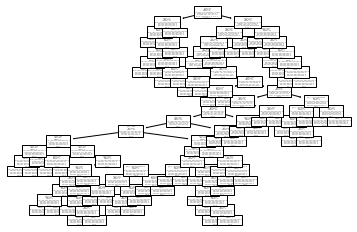

In [ ]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, training_scores_encoded)
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_12 <= 8.50
|   |--- feature_12 <= 7.50
|   |   |--- feature_12 <= 3.00
|   |   |   |--- class: 0
|   |   |--- feature_12 >  3.00
|   |   |   |--- feature_6 <= 4.05
|   |   |   |   |--- feature_13 <= 0.43
|   |   |   |   |   |--- feature_5 <= 0.75
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_5 >  0.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_13 >  0.43
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_6 >  4.05
|   |   |   |   |--- class: 4
|   |--- feature_12 >  7.50
|   |   |--- class: 5
|--- feature_12 >  8.50
|   |--- feature_12 <= 57.75
|   |   |--- feature_12 <= 56.75
|   |   |   |--- feature_12 <= 56.25
|   |   |   |   |--- feature_12 <= 55.75
|   |   |   |   |   |--- feature_12 <= 10.50
|   |   |   |   |   |   |--- feature_12 <= 9.50
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- feature_12 >  9.50
|   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- feature_12 >  10.5

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X_test)
# cf_mat=confusion_matrix(X_test,y_pred)
print(y_pred)
# # lab_enc.fit_transform(y_test)
# print(cf_mat)


[51 35  0  5 29 44 49 50 47  5 51 25 16  5 55 19 53  5 53 51 53 29 30  5
  5  5  7  5  7 55 53 11 51 53 50 52  7 53 16 51  7 27 40 17 53 51 55  6
  5  5  5 55 50 44  5  5 53 54 51  5  5  9 29 55 53 29 29 53 14 47 20 53
 25 11 49 53 27 51 51  5 52  5 55 51 47 43  5 55 25  7 40 40  9  5 16 35
 14 50 27 25  5 53  5 11 11 51  7  5  6 53  6 51 11 50 23 52 14 23 16 51
 55  6  5 41 53  5 50 50 53 14 45 31 11 51  6  5 38 41  9 16  5 51 19 26
 51 11 50  9  5 11  5 51 51 55 55 41 47 24  7 11 27 51 16 16  5  7 53 27
  5 55  5  5 49  5  6 29 53 50 51  5 51  6 55 14 51  5 51 26  7 51 47 41
  5 53 57 50 50 55 29 27  5  5 43 49 51  6  7  5 50  5  5  5 48 11  4  5
 27  5  9 55  5 51 53 53 55  7  9 14 51 51 15 23 51  5  7 51  5  5 49 56]


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
print("accuracy:",accuracy_score(text_scores_encoded,y_pred))
#  precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision score:",precision_score(text_scores_encoded,y_pred,average='micro'))
print("recall score:",recall_score(text_scores_encoded,y_pred,average="micro"))

accuracy: 0.004166666666666667
Precision score: 0.004166666666666667
recall score: 0.004166666666666667


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(text_scores_encoded,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

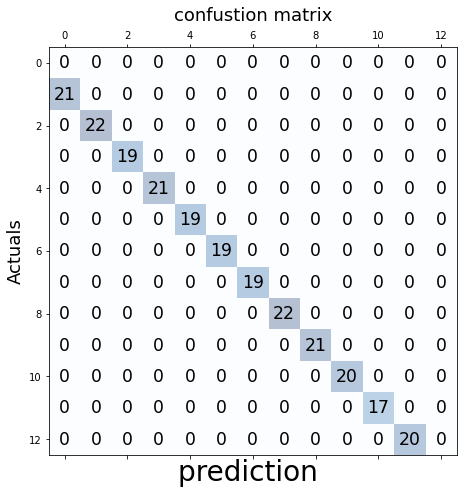

In [ ]:
from sklearn.metrics import confusion_matrix
7

conf_mat=confusion_matrix(y_true=y_test.round() ,y_pred=y_pred)
fig,ax=plt.subplots(figsize=(7.5,7.5))
ax.matshow(conf_mat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center',size='xx-large')
plt.xlabel("prediction ",fontsize=28)
plt.ylabel("Actuals",fontsize=18)
plt.title("confustion matrix",fontsize=18)
plt.show()

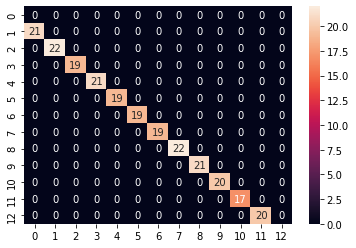

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')